In [22]:
import pandas as pd
import joblib

import shap

In [23]:
random_forest = joblib.load('../models/best_model_random_forest.pkl')


Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations


# Shap Values erstellen


In [24]:
#from sklearn.preprocessing import StandardScaler
#from sklearn.model_selection import train_test_split

In [25]:
'''
tat = pd.read_csv("../data/lucas_organic_carbon_training_and_test_data_NEW.csv")
targets = pd.read_csv("../data/lucas_organic_carbon_target.csv")

scaler = StandardScaler()
scaled_data = scaler.fit_transform(tat)
scaled_df = pd.DataFrame(scaled_data, columns=tat.columns)

tat_train, tat_test, targets_train, targets_test = train_test_split(scaled_data, targets, test_size=0.2, random_state=42)
'''

'\ntat = pd.read_csv("../data/lucas_organic_carbon_training_and_test_data_NEW.csv")\ntargets = pd.read_csv("../data/lucas_organic_carbon_target.csv")\n\nscaler = StandardScaler()\nscaled_data = scaler.fit_transform(tat)\nscaled_df = pd.DataFrame(scaled_data, columns=tat.columns)\n\ntat_train, tat_test, targets_train, targets_test = train_test_split(scaled_data, targets, test_size=0.2, random_state=42)\n'

In [26]:
#explainer = shap.TreeExplainer(random_forest)
#shap_values = explainer(tat_train)

In [27]:
#joblib.dump(shap_values, './saved_values/randomforest-shapley_values')

# Explanation kürzen

In [45]:
#explanation = joblib.load("./saved_values/randomforest-shapley_values")
#explanation

In [29]:
#explanation.shape

In [46]:
#explanation_sliced = explanation[:,0:20,:]
#explanation_sliced

In [31]:
#explanation_sliced.shape

In [47]:
#joblib.dump(explanation_sliced, './saved_values/randomforest-shapley_values_sliced')

['./saved_values/randomforest-shapley_values_sliced']

# Plot values

### Erklärungen

Die Explanation ist ein 3 dimensionales Array, aufgebaut in (samples, values, classes), also (nach dem Kürzen) zu allen 7916 samples jeweils 20 values (hier diese Wellenlängen) und zu jeder Wellenlänge 5 Werte (die fünf Kategorien very_low, high etc.).

Das Kürzen bzw. slicen von der Explanation funktioniert wie folgt: man kann in den ekigen Klammern zu allen drei Dimensionen den Start- und End-Index angeben: explanation[start:end, start:end, start:end]
Default ist: start = 0 und end= das Maximum
Das heißt, wenn man explanation[:,:,:] schreibt, bedeutet das dasselbe wie explanation[0:7916,0:20,0:5], also das gesamte array.
Wenn man nur die ersten 20 Wellenlängen anschauen will, schreibt man: explanation[:,:20,:]

In den Plots kann man nicht einfach so alles Kategorien zusammen plotten. Beim Beeswarm geht das zum Beispiel nicht. Da muss man sich bei x für eine Kategorie entscheiden: explanation[:,:20,x]

### Offene Fragen / Todos
1. Ist die Explanation richtig gekürzt? Also sind die ersten 20 Wellenlängen auch die 20 wichtigsten?
2. Wie kann man in den Plots die Features richtig benennen? (Also dass da die entsprechenden Wellenlängen stehen.)
3. Welche Kategorie von 0,1,2,3,4 ist welche? Ist das sortiert nach 0=very_high, 1=high, 2=moderate, 3=low, 4=very_low?
4. Wie kann man im Summary plot die Kategorien mit plotten?
5. Allgemein, wie kann man die Values anschaulich plotten?

In [48]:
explanation = joblib.load("./saved_values/randomforest-shapley_values_sliced")
explanation

.values =
array([[[-4.48428068e-04, -2.69884390e-05, -1.48580373e-04,
         -2.44977139e-05,  6.48494593e-04],
        [-2.44278795e-04, -9.53403193e-05, -2.21243678e-04,
         -5.69719697e-05,  6.17834762e-04],
        [-2.97192686e-04, -3.22519118e-04, -3.13364358e-04,
         -8.36664988e-05,  1.01674266e-03],
        ...,
        [-1.23885020e-04, -9.81801349e-05, -1.85491886e-04,
         -2.26340199e-05,  4.30191060e-04],
        [-1.19455860e-04,  2.83036645e-05, -2.11572441e-04,
         -1.95104633e-05,  3.22235101e-04],
        [-2.59510826e-04, -3.92145607e-04, -3.09578277e-04,
         -3.63127166e-05,  9.97547426e-04]],

       [[ 4.85062812e-05,  4.14578985e-05,  1.41086003e-04,
         -1.46222375e-05, -2.16427945e-04],
        [ 1.04800440e-04, -4.39784010e-05,  1.03467115e-04,
          3.97747811e-06, -1.68266632e-04],
        [ 2.45810981e-05, -9.29241915e-06,  9.91262342e-05,
         -5.13044954e-06, -1.09284464e-04],
        ...,
        [ 2.37428110e-05, 

In [ ]:
explanation.shape

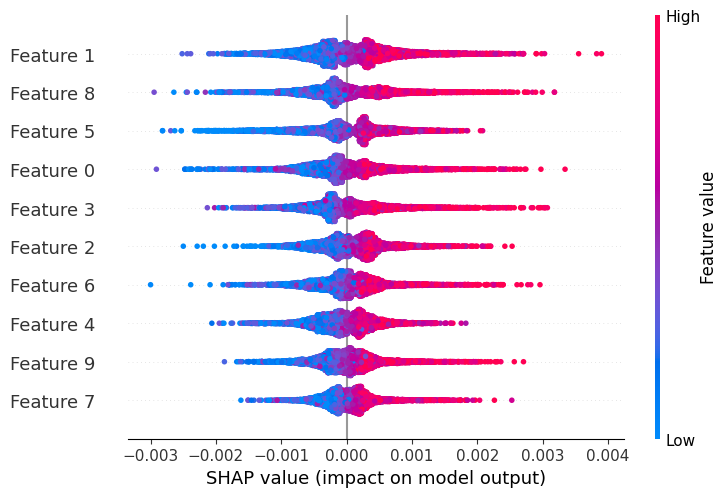

In [56]:
shap.plots.beeswarm(explanation[:,:10,4])

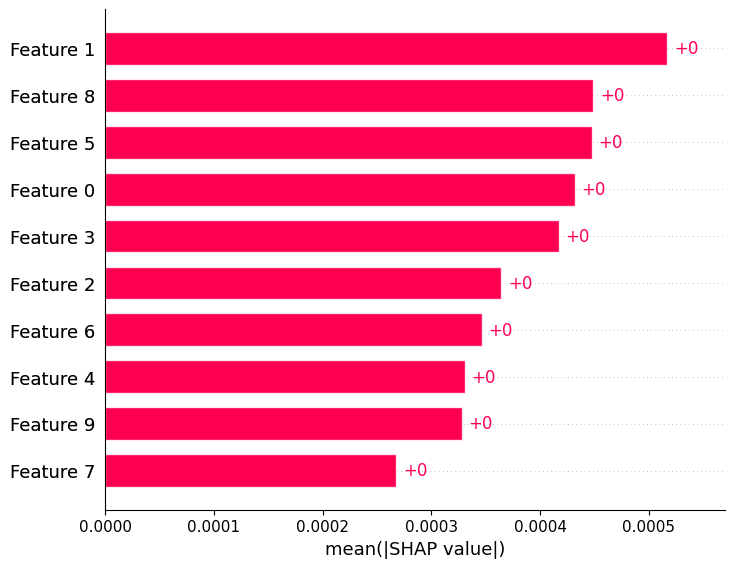

In [57]:
shap.plots.bar(explanation[:,:10,4])